In [1]:
# Q2

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
Salary_hike = pd.read_csv('Salary_Data.csv')           #reading data & saving it into Salary_hike
Salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
x = Salary_hike['YearsExperience']
y = Salary_hike['Salary']

In [5]:
# #using polynomial regression formula-- = a+b*x                      b=((x-xbar)*(y-ybar))/(x-xbar)**2      a=ybar-b*xbar
# a, b = np.polynomial.polynomial.polyfit(x, y, 1)                  # 1=Degree of freedom
# print('a =',a,'b =',b)
# #plotting scatter plot
# plt.scatter(x, y)                                                # plotting scatter with x & y
# plt.plot(x, a+b*x)                                               # plotting line with x & polynomial regression
# #print(a+b*x)
# plt.title('Scatter plot Salary Hike')
# plt.xlabel('YearsExperience')
# plt.ylabel('Salary')
# plt.show()

<Axes: xlabel='YearsExperience', ylabel='Density'>

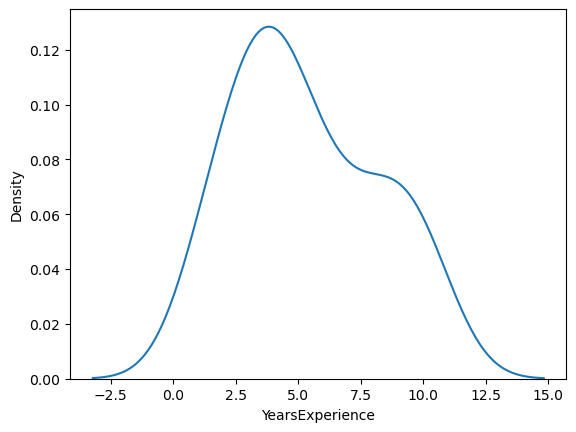

In [6]:
sns.kdeplot(Salary_hike["YearsExperience"])
#sns.histplot(Salary_hike['YearsExperience'],kde='True')

<Axes: xlabel='Salary', ylabel='Density'>

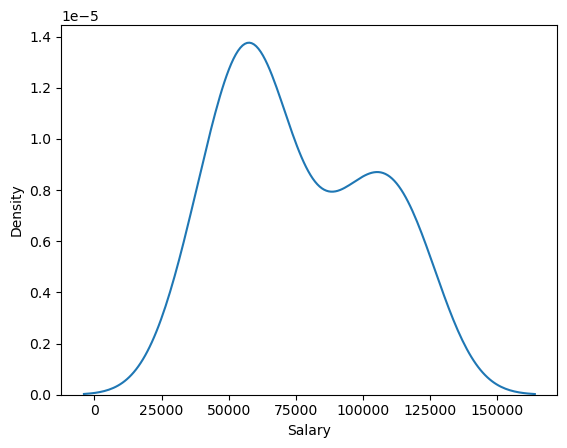

In [7]:
sns.kdeplot(Salary_hike["Salary"])
#sns.histplot(Salary_hike['Salary'],kde='True')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

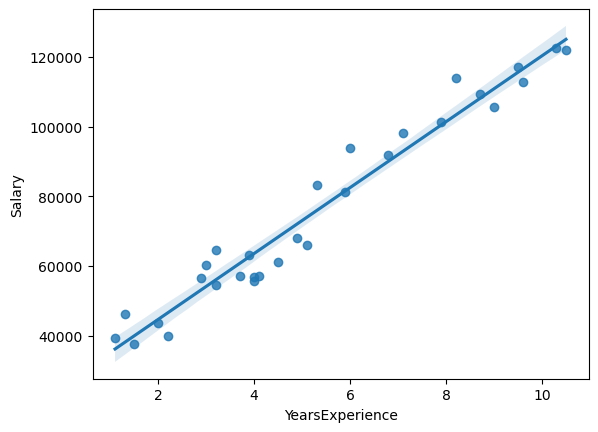

In [8]:
sns.regplot(x= Salary_hike['YearsExperience'],y=Salary_hike['Salary'])

In [9]:
Salary_hike.corr()                                     #finding correlation
# near to 1 means strongly +ve crltion

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Model-1 Regression Model building

In [10]:
model = sm.OLS(y, x).fit()
#y = dependent variable , x = independent variable
predictions = model.predict(x)

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                    2.56e-24
Time:                        12:06:17   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-2 Log transformation of X

In [12]:
#It's used to compress range of vals & make distribution of the data more normal. This can be helpful when the data is skewed. also helps to linearize the relationship between two variables, which improve the accuracy of the regression model.

In [13]:
x_log = np.log(Salary_hike['YearsExperience'])

In [14]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                    8.06e-26
Time:                        12:06:17   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-3 Log Transformation of Y

In [16]:
y_log = np.log(Salary_hike['Salary'])

In [17]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                    6.09e-12
Time:                        12:06:17   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-4 Log Transformation of X & Y

In [19]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                    8.60e-15
Time:                        12:06:17   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-5 Sq Root Transformation of X

In [21]:
x_sqrt = np.sqrt(Salary_hike['YearsExperience'])

In [22]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                    3.62e-30
Time:                        12:06:17   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-6 Square Root Transformation of Y

In [24]:
y_sqrt = np.sqrt(Salary_hike['Salary'])

In [25]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                    2.12e-16
Time:                        12:06:17   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-7 Square Root Transformation of X & Y

In [27]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                    2.81e-29
Time:                        12:06:17   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpretation

In [29]:
# We will use Model 5 as it has the highest R value         i.e Explanatory power is  98.8%
 
# p-value < 0.05             Thus the model is accepted

# coefficient = 118.8652    i.e if Years of Experience increased by 1,predicted value of salary hike will increase by 118.8652